In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns

Загружаем данные с https://github.com/CSSEGISandData/COVID-19

In [2]:
'''confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
countries = pd.read_csv('countries.csv')'''

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recovered = pd.read_csv(url)


In [3]:
recovered.shape

(250, 102)

In [4]:
confirmed[confirmed.loc[:,'Country/Region'] == 'Russia']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
187,NaN,Russia,60.0,90.0,0,0,0,0,0,0,...,42853,47121,52763,57999,62773,68622,74588,80949,87147,93558


In [5]:
def DateFormatter(s):
    """
    форматирует строку с датой вида 4/1/20 в строку 01.04
    """
    s = s.split('/')
    if len(s) < 3:
        return '0'
    return '{:02}.{:02}'.format(int(s[1]), int(s[0]))
    return str(s)

In [6]:
def add_value_labels(ax, spacing=5):
    """
    добавляем значения к каждому столбцу в barplot
    ax - matplotlib.Axes
    spacing - величина отступа
    """
    
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'

        label = abs(int(y_value))

        # Create annotation
        ax.annotate(
            label,                      # Use 'label' as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by 'space'
            textcoords="offset points", # Interpret 'xytext' as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [7]:
region_name = 'Russia'
n_days = 20

if len(recovered[recovered.loc[:,'Province/State'] == region_name]) > 0:
    confirmed_data = confirmed[confirmed.loc[:,'Province/State'] == region_name].iloc[0,-n_days:]
    new_confirmed_data = confirmed[confirmed.loc[:,'Province/State'] == region_name].iloc[0,-n_days:] - confirmed[confirmed.loc[:,'Province/State'] == region_name].iloc[0,-n_days-1:-1].values
    recovered_data = recovered[recovered.loc[:,'Province/State'] == region_name].iloc[0,-n_days:]
    deaths_data = deaths[deaths.loc[:,'Province/State'] == region_name].iloc[0,-n_days:]
elif len(recovered[recovered.loc[:,'Country/Region'] == region_name]) > 0:
    confirmed_data = confirmed[confirmed.loc[:,'Country/Region'] == region_name].iloc[:,-n_days:].sum()
    new_confirmed_data = confirmed[confirmed.loc[:,'Country/Region'] == region_name].iloc[:,-n_days:].sum() - confirmed[confirmed.loc[:,'Country/Region'] == region_name].iloc[:,-n_days-1:-1].sum().values
    recovered_data = recovered[recovered.loc[:,'Country/Region'] == region_name].iloc[:,-n_days:].sum()
    deaths_data = deaths[deaths.loc[:,'Country/Region'] == region_name].iloc[:,-n_days:].sum()
else:
    print('not found')

confirmed_data.index = [DateFormatter(s) for s in confirmed_data.index]
new_confirmed_data.index = [DateFormatter(s) for s in new_confirmed_data.index]
recovered_data.index = [DateFormatter(s) for s in recovered_data.index]

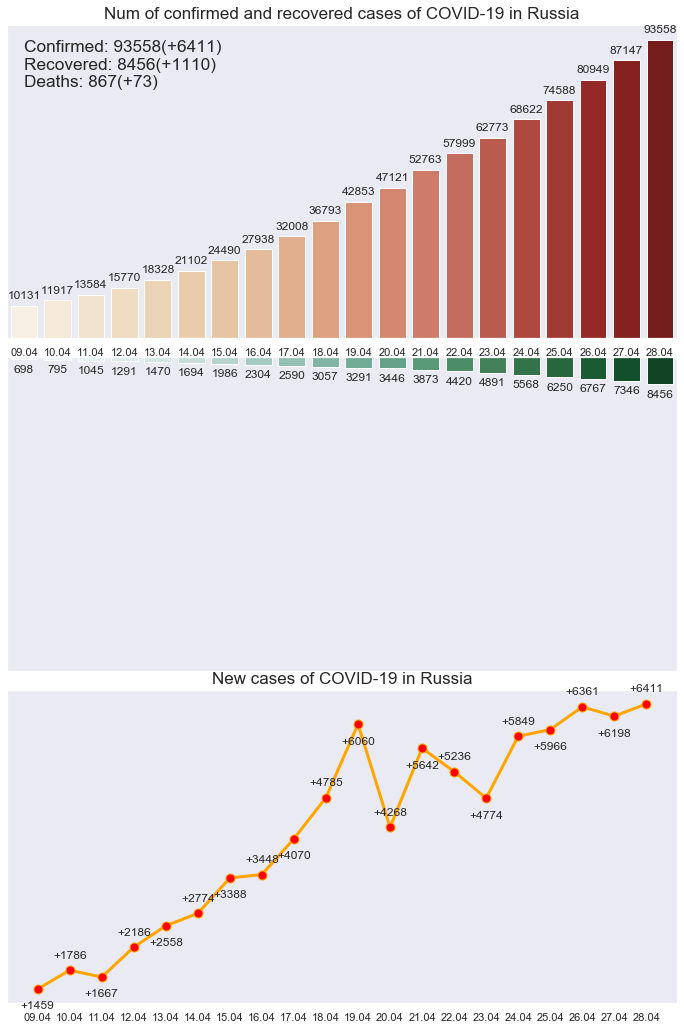

In [9]:
sns.set(style = 'dark', rc={'figure.figsize':(12,18)})
#sns.set_style("white")
fig, ax = plt.subplots(3,1)
plt.subplots_adjust(wspace=5, hspace=0.06)


#1 график
x = list(range(len(confirmed_data.index)))
xs = confirmed_data.index
y = confirmed_data.values
sns.barplot(x, y, palette="OrRd", ax = ax[0], saturation = 0.6)
ax[0].set_xticklabels(xs)

#отключить подписи по y
formatter = matplotlib.ticker.NullFormatter()
ax[0].yaxis.set_major_formatter(formatter)

#добавить подписи к слолбцам
add_value_labels(ax[0])


ax[0].set_title('Num of confirmed and recovered cases of COVID-19 in ' + region_name,fontdict ={'fontsize':17})
txt = 'Confirmed: {}(+{})\n Recovered: {}(+{})\n Deaths: {}(+{})'.format(confirmed_data[-1],confirmed_data[-1]-confirmed_data[-2],recovered_data[-1],recovered_data[-1]-recovered_data[-2],deaths_data[-1],deaths_data[-1]-deaths_data[-2])
ax[0].text(0,max(y),txt,va='top',wrap=True,fontsize = 'x-large')



#2 график
#x = recovered_data.index
x = list(range(len(recovered_data.index)))
xs = recovered_data.index
y = -recovered_data.values
sns.barplot(x, y, palette="BuGn", ax = ax[1], saturation = 0.6)
ax[1].set_xticklabels(xs)

#отключить подписи
formatter = matplotlib.ticker.NullFormatter()
ax[1].yaxis.set_major_formatter(formatter)
ax[1].xaxis.set_major_formatter(formatter)


#добавить подписи к слолбцам
add_value_labels(ax[1])

#масштаб по y как у первого
ax[1].set_ylim((-ax[0].get_ylim()[1],0))



#3 график
xs = new_confirmed_data.index
x = [str(i) for i in range(len(new_confirmed_data.index))]
y = new_confirmed_data.values
ax[2].set_xticklabels(xs)
#sns.lineplot(x, y, color  = 'mediumseagreen', marker = 'o', ax=ax)
ax[2].plot(x,y,color='orange', lw = 3,marker='o', markerfacecolor='red',markersize=9,)

#отключить подписи по y
formatter = matplotlib.ticker.NullFormatter()
ax[2].yaxis.set_major_formatter (formatter)
#ax[2].xaxis.set_major_formatter (formatter)
for i in range(len(x)):
    space = -20 if i%2 == 0 else 12
    lbl = '+'+str(y[i]) if y[i]>0 else str(y[i])
    ax[2].annotate(lbl, xy = (x[i],y[i]), xytext=(0, space), textcoords="offset points", ha='center',)

ax[2].set_title('New cases of COVID-19 in ' + region_name,fontdict ={'fontsize':17})
    
    
plt.show()
#plt.scatter(x=dt.index, y=dt.values[0])